In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from torch.nn import Linear

# Basic

Text(0.5, 0, 'x')

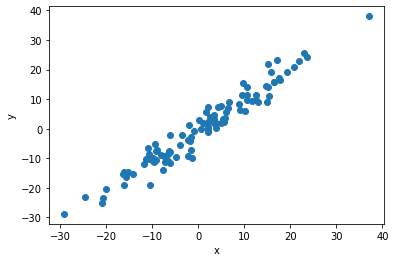

In [ ]:
X = torch.randn(100, 1)*10
# weight = 3
y = X + 3*torch.randn(100, 1)
plt.plot(X.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('x')

In [ ]:
model = nn.Linear(1, 1)
# arbitary weight, without seeing the data
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.7137]], requires_grad=True)
Parameter containing:
tensor([0.2748], requires_grad=True)


<div class="alert alert-info"><strong>NOTE:</strong> The "Linear" model layer used here doesn't really refer to linear regression. Instead, it describes the type of neural network layer employed. Linear layers are also called "fully connected" or "dense" layers. Going forward our models may contain linear layers, convolutional layers, and more.</div>

In [ ]:
class LR(nn.Module):
    def __init__(self, input_size, output_size):
        # calling init of parent Class
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
        pred = self.linear(x)
        return pred

In [ ]:
torch.manual_seed(59)
model = LR(1, 1)
# initial parameters generated by system randomly
for name, param in model.named_parameters():
    print(name, '\t', param.item())

linear.weight 	 0.10597813129425049
linear.bias 	 0.9637961387634277


In [ ]:
x = torch.tensor([2.0])
print(model.forward(x))

tensor([1.1758], grad_fn=<AddBackward0>)


which is confirmed with $f(x) = (0.1060)(2.0)+(0.9638) = 1.1758$

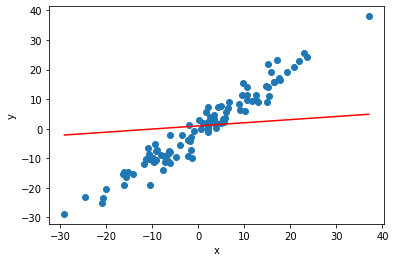

In [ ]:
x1 = np.array([X.min(),X.max()])
# ax + b
[w, b] = model.parameters()
y1 = w.item() * x1 + b.item()

plt.scatter(X.numpy(), y.numpy())
plt.plot(x1, y1,'r')
plt.ylabel('y')
plt.xlabel('x');

The initial Model without loss function

# Model Training

In [ ]:
X = torch.randn(100, 1)*10
# weight = 3
y = X + 3*torch.randn(100, 1)

In [ ]:
class LR(nn.Module):
    def __init__(self, input_size, output_size):
        # calling init of parent Class
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
        pred = self.linear(x)
        return pred

# define model, loss function and optimizer
model = LR(1, 1)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-3)

In [ ]:
# train model
epochs = 50
losses = []

for i in range(epochs):
    i+=1
    y_pred = model.forward(X) # create predictions
    loss = criterion(y_pred, y) # calculate loss
    losses.append(loss)
    
    w, b = model.parameters()
    print(f"\nepoch: {i}; loss: {loss.item()}; weight: {w.item()}; bias: {b.item()}")
    print(f"Gradient1: {w.grad}; Gradient1: {b.grad};")
    
    # Reset the stored gradient for new epoch to prevent compounding, as Gradients accumulate with every backprop. 
    optimizer.zero_grad()
    # backprop to get the derivative, gradient of w,b will change after backprop
    loss.backward()
    # update the hyperparameters of our model according to the gradient of w and b
    optimizer.step()


epoch: 1; loss: 149.09555053710938; weight: -0.2193373441696167; bias: 0.4400578737258911
Gradient1: None; Gradient1: None;

epoch: 2; loss: 97.20538330078125; weight: 0.02111019194126129; bias: 0.4444037079811096
Gradient1: tensor([[-240.4475]]); Gradient1: tensor([-4.3458]);

epoch: 3; loss: 64.45445251464844; weight: 0.21213851869106293; bias: 0.44764548540115356
Gradient1: tensor([[-191.0283]]); Gradient1: tensor([-3.2418]);

epoch: 4; loss: 43.78325271606445; weight: 0.3639058470726013; bias: 0.4500105381011963
Gradient1: tensor([[-151.7673]]); Gradient1: tensor([-2.3650]);

epoch: 5; loss: 30.7362060546875; weight: 0.48448216915130615; bias: 0.4516794681549072
Gradient1: tensor([[-120.5763]]); Gradient1: tensor([-1.6689]);

epoch: 6; loss: 22.501157760620117; weight: 0.580278754234314; bias: 0.45279577374458313
Gradient1: tensor([[-95.7966]]); Gradient1: tensor([-1.1163]);

epoch: 7; loss: 17.30320930480957; weight: 0.656389057636261; bias: 0.45347341895103455
Gradient1: tensor(

Text(0.5, 0, 'epoch')

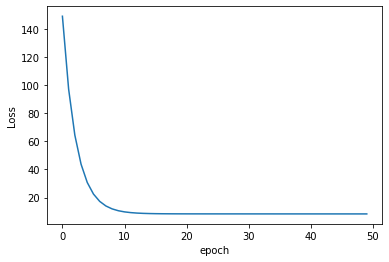

In [ ]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

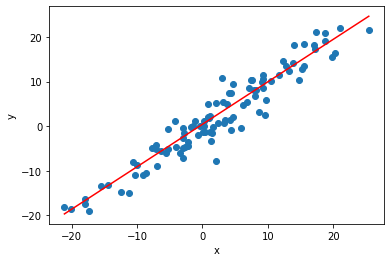

In [ ]:
x1 = np.array([X.min(),X.max()])
# ax + b
[w, b] = model.parameters()
y1 = w.item() * x1 + b.item()

plt.scatter(X.numpy(), y.numpy())
plt.plot(x1, y1,'r')
plt.ylabel('y')
plt.xlabel('x');